In [1]:
%matplotlib notebook 

In [2]:
import math
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

In [3]:
from rotations.quaternions import Quaternion

In [4]:
def rotate_vector(q1, vector):
    vec_quat = Quaternion(*vector, 0)
    rotated = q1 * vec_quat * q1.conjugate()
    return rotated.imaginary

In [5]:
rotation_end = Quaternion.from_axis_angle(np.array([0, 1, 0]), 10)
rotation_init = Quaternion.from_axis_angle(np.array([1, 1, 1]), 150)

vector_x = np.array([1, 0, 0])
vector_y = np.array([0, 1, 0])
vector_z = np.array([0, 0, 1])
n=6

In [6]:
def slerp(q1, q2, vector, n):
    t_s = np.linspace(0, 1, n)
    rotations = [Quaternion.slerp(rotation_init, rotation_end, t, 1) for t in t_s]
    return np.array([rotate_vector(rotation, vector) for rotation in rotations])

In [7]:
def linear_interpolation(vector1, vector2, n):
    t_s = np.linspace(0, 1, n)
    diff = vector2 - vector1
    return np.array([vector1 + diff * t for t in t_s])

In [8]:
rotated_x = slerp(rotation_init, rotation_end, vector_x, n).T
rotated_y = slerp(rotation_init, rotation_end, vector_y, n).T
rotated_z = slerp(rotation_init, rotation_end, vector_z, n).T

<IPython.core.display.Javascript object>


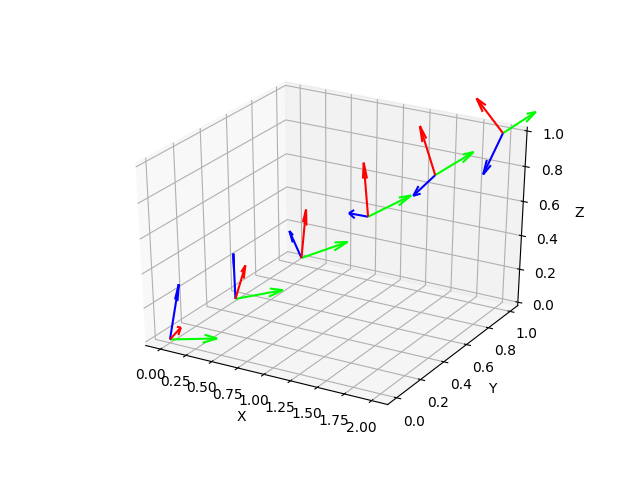

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
positions = linear_interpolation(np.array([0, 0, 0]), np.array([2, 1, 1]), n).T
ax.quiver(*positions, *rotated_x, length=0.3, normalize=True, color=(1, 0, 0))
ax.quiver(*positions, *rotated_y, length=0.3, normalize=True, color=(0, 1, 0))
ax.quiver(*positions, *rotated_z, length=0.3, normalize=True, color=(0, 0, 1))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

<IPython.core.display.Javascript object>


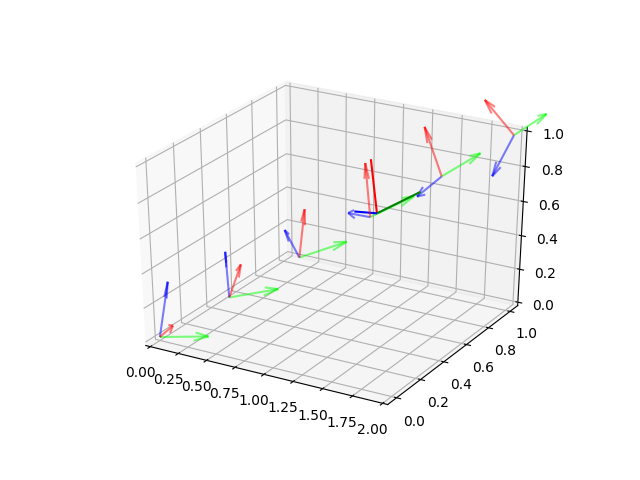

In [31]:
position = np.array([0, 0, 0])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim([0, 2])
ax.quiver(*positions, *rotated_x, length=0.3, normalize=True, color=(1, 0, 0, 0.5))
ax.quiver(*positions, *rotated_y, length=0.3, normalize=True, color=(0, 1, 0, 0.5))
ax.quiver(*positions, *rotated_z, length=0.3, normalize=True, color=(0, 0, 1, 0.5))
Q = ax.quiver([], [], [], [], [], [])

def quiver_data_to_segments(X, Y, Z, u, v, w, length=0.3):
    segments = (X, Y, Z, X+u*length, Y+v*length, Z+w*length)
    segments = np.array(segments).reshape(6,-1)
    return [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

def update_quiver(frame, Q):
    t = (1 - math.cos(frame / 36)) / 2
    rotation = Quaternion.slerp(rotation_init, rotation_end, t, 1)
    plt_vector_X = rotate_vector(rotation, vector_x)
    plt_vector_Y = rotate_vector(rotation, vector_y)
    plt_vector_Z = rotate_vector(rotation, vector_z)
    position = np.array([2, 1, 1]) * t
    positions = np.array([position] * 3).T
    vectors = np.array([plt_vector_X, plt_vector_Y, plt_vector_Z]).T
    segments = quiver_data_to_segments(*positions, *vectors)
    Q.set_segments(segments)
    Q.set_color(['red', 'green', 'blue'])
    return Q

anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, ), frames=range(0, 232), interval=1000/60, blit=False)

plt.show()

In [32]:
anim.save('Rotations.gif', dpi=75, writer='imagemagick')